In [4]:
import pandas as pd
import numpy as np
import json
import re
from plotnine import *
import plotnine


%matplotlib inline
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)



# 그래프에서 한글표현을 위해 폰트를 설치합니다.
%config InlineBackend.figure_format = 'retina'



matplotlib.rc('font', family='NanumBarunGothic')  # MacOS
plt.rcParams['axes.unicode_minus'] = False


# pandas max row 
pd.options.display.max_rows = 3000


In [5]:

b_unit = pd.read_csv('data/1.세종시_전유부.csv', dtype={'로트':object})
b_info = pd.read_csv('data/2.세종시_표제부.csv',  dtype={'로트':object})

/Users/seungjun/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (10,13) have mixed types.Specify dtype option on import or set low_memory=False.


## 표제부 정리
- 동명칭, 특징 정리  
예) 101동, 유치원, 경비실

In [6]:
b_info.head()

,순번,대지위치,시군구코드,법정동코드,대지구분코드,번,지,대장구분코드명,건물명,동명칭,연면적(㎡),구조코드명,주용도코드명,세대수(세대),사용승인일,Unnamed: 15
0,1,세종특별자치시 반곡동 146-75번지,36110,10100,1,146,75,일반,NaN,NaN,135.24,벽돌구조,단독주택,0,1977.0,NaN
1,2,세종특별자치시 반곡동 146-79번지,36110,10100,1,146,79,일반,NaN,1동,576,강파이프구조,동.식물관련시설,0,1999.0,NaN
2,3,세종특별자치시 반곡동 146-79번지,36110,10100,1,146,79,일반,NaN,2동,336,강파이프구조,동.식물관련시설,0,20041223.0,NaN
3,4,세종특별자치시 반곡동 146-79번지,36110,10100,1,146,79,일반,NaN,3동,127.19,강파이프구조,창고시설,0,19950726.0,NaN
4,5,세종특별자치시 반곡동 180-1번지,36110,10100,1,180,1,일반,솔빛숲유치원,NaN,2697.74,철근콘크리트구조,교육연구시설,0,20190228.0,NaN


In [7]:
b_info.dtypes

순번               int64
대지위치            object
시군구코드            int64
법정동코드            int64
대지구분코드           int64
번                int64
지                int64
대장구분코드명         object
건물명             object
동명칭             object
연면적(㎡)          object
구조코드명           object
주용도코드명          object
세대수(세대)         object
사용승인일          float64
Unnamed: 15    float64
dtype: object

In [8]:
# 표제부 동명칭 
dong_name = b_info[['동명칭']]
dong_names = b_info['동명칭'].unique()


### 패턴 매칭
- (숫자)동


In [9]:
# 숫자 동 분리
b_info['동'] = b_info['동명칭'].str.findall('[\d]+동').str.join("")
# 숫자 ~ 동 제거
b_info['동명칭'] = b_info['동명칭'].str.findall('[^\d동()-]').str.join("")


In [10]:
b_info.head(3)

,순번,대지위치,시군구코드,법정동코드,대지구분코드,번,지,대장구분코드명,건물명,동명칭,연면적(㎡),구조코드명,주용도코드명,세대수(세대),사용승인일,Unnamed: 15,동
0,1,세종특별자치시 반곡동 146-75번지,36110,10100,1,146,75,일반,NaN,NaN,135.24,벽돌구조,단독주택,0,1977.0,NaN,NaN
1,2,세종특별자치시 반곡동 146-79번지,36110,10100,1,146,79,일반,NaN,,576,강파이프구조,동.식물관련시설,0,1999.0,NaN,1동
2,3,세종특별자치시 반곡동 146-79번지,36110,10100,1,146,79,일반,NaN,,336,강파이프구조,동.식물관련시설,0,20041223.0,NaN,2동


In [11]:
b_info.to_csv('test.csv', encoding='utf-8-sig')

## 전유부 Refactoring
공모전에서 제공한 데이터가 부족하여 공공데이터 API를 활용하여 전유부 데이터를 추가

In [12]:
# API를 통해 생생된 전유부 Data 가져오기
b_unit = pd.read_csv('전유부.csv', dtype={
    '건물명':object, 
    '시군구코드': object, 
    '법정동코드' : object, 
    '층번호': np.int64, 
    '번' : object, 
    '지' : object, 
    '층구분코드': object 
    }
)

/Users/seungjun/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.


In [13]:
b_unit.head()

,대지주소,시군구코드,법정동코드,동명칭,호명칭,층구분코드,층번호,면적(전용면적),건물명,번,지,용도코드명,주용도코드,기타용도
0,세종특별자치시 반곡동 4121-1002번지,36110,10100,주건축물제1동,101,20,1,3.2402,세종펠리스,4121,1002,일반음식점,4001,"일반음식점(기계,전기실)"
1,세종특별자치시 반곡동 4121-1002번지,36110,10100,주건축물제1동,101,20,1,39.3700,세종펠리스,4121,1002,일반음식점,4001,제2종근생(일반음식점)
2,세종특별자치시 반곡동 4121-1002번지,36110,10100,주건축물제1동,101,20,1,10.3346,세종펠리스,4121,1002,일반음식점,4001,"일반음식점(계단실,복도등)"
3,세종특별자치시 반곡동 4121-1002번지,36110,10100,주건축물제1동,101,20,1,33.6765,세종펠리스,4121,1002,일반음식점,4001,일반음식점(주차장)
4,세종특별자치시 반곡동 4121-1002번지,36110,10100,주건축물제1동,102,20,1,48.9500,세종펠리스,4121,1002,일반음식점,4001,제2종근생(일반음식점)


In [14]:
b_unit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998862 entries, 0 to 998861
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   대지주소      998862 non-null  object 
 1   시군구코드     998862 non-null  object 
 2   법정동코드     998862 non-null  object 
 3   동명칭       977407 non-null  object 
 4   호명칭       998772 non-null  object 
 5   층구분코드     998856 non-null  object 
 6   층번호       998862 non-null  int64  
 7   면적(전용면적)  998862 non-null  float64
 8   건물명       991299 non-null  object 
 9   번         998862 non-null  object 
 10  지         998862 non-null  object 
 11  용도코드명     995844 non-null  object 
 12  주용도코드     995844 non-null  object 
 13  기타용도      997698 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 106.7+ MB


In [15]:
b_unit['주용도코드']

0         4001
1         4001
2         4001
3         4001
4         4001
          ... 
998857     NaN
998858    2003
998859     NaN
998860    2003
998861     NaN
Name: 주용도코드, Length: 998862, dtype: object

<AxesSubplot:>

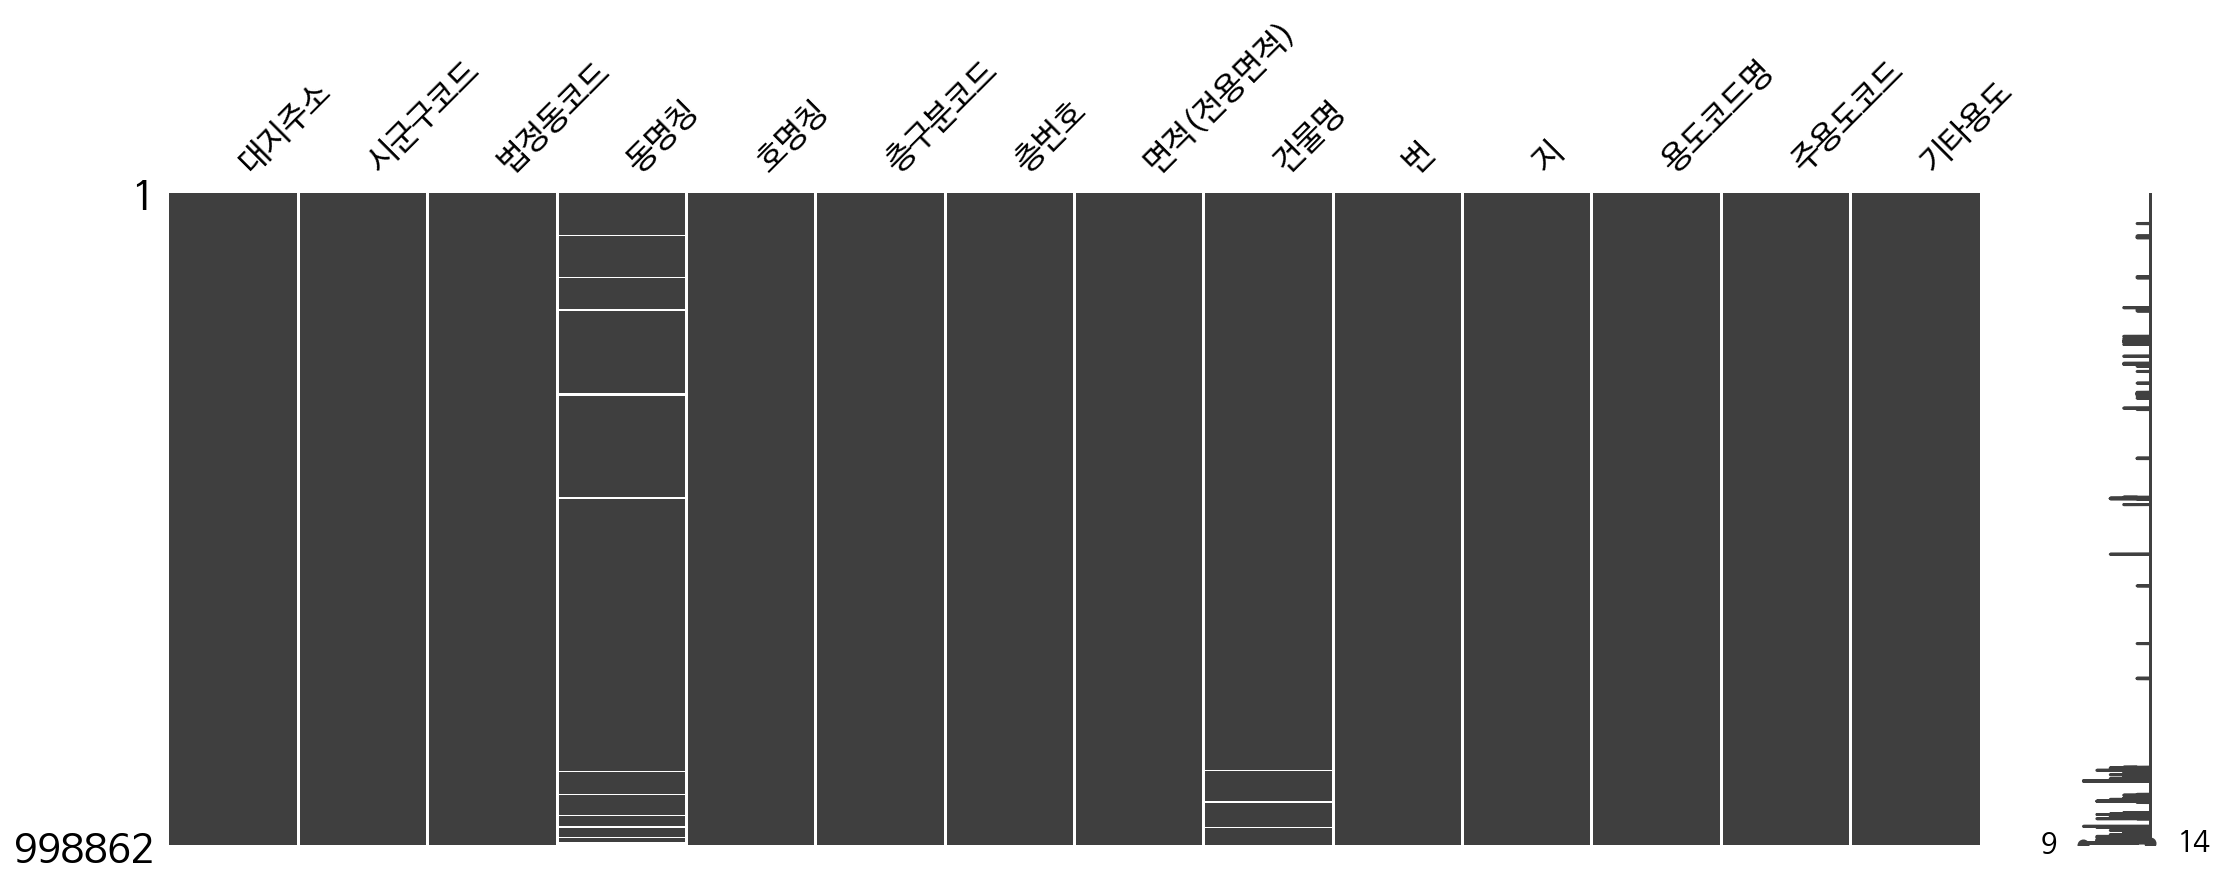

In [17]:
# 결측치 보기
import missingno as msno
msno.matrix(b_unit, figsize=(18,6))

In [18]:
b_unit.isnull().sum()

대지주소            0
시군구코드           0
법정동코드           0
동명칭         21455
호명칭            90
층구분코드           6
층번호             0
면적(전용면적)        0
건물명          7563
번               0
지               0
용도코드명        3018
주용도코드        3018
기타용도         1164
dtype: int64

In [19]:
bld_null = b_unit[b_unit['건물명'].isnull()]
bld_null[bld_null['기타용도'].str.contains('아파트',na=False)].head()

,대지주소,시군구코드,법정동코드,동명칭,호명칭,층구분코드,층번호,면적(전용면적),건물명,번,지,용도코드명,주용도코드,기타용도
884705,세종특별자치시 조치원읍 정리 59-1번지,36110,25025,101동,1207호,20,12,84.82,NaN,0059,0001,아파트,2001,아파트
884711,세종특별자치시 조치원읍 정리 59-1번지,36110,25025,101동,1306호,20,13,84.82,NaN,0059,0001,아파트,2001,아파트
884717,세종특별자치시 조치원읍 정리 59-1번지,36110,25025,101동,1405호,20,14,59.75,NaN,0059,0001,아파트,2001,아파트
884723,세종특별자치시 조치원읍 정리 59-1번지,36110,25025,101동,1407호,20,14,75.20,NaN,0059,0001,아파트,2001,아파트
884729,세종특별자치시 조치원읍 정리 59-1번지,36110,25025,101동,1106호,20,11,84.82,NaN,0059,0001,아파트,2001,아파트


## 거래 매매 기록을 통해 결측치 채우기
### 아파트 매매, 전월세


In [67]:
apt_mth = pd.read_csv('data/아파트_전월세.csv').drop('Unnamed: 0', axis=1)
apt_trd = pd.read_csv('data/아파트_매매.csv').drop('Unnamed: 0', axis=1)

In [68]:
apt_trd.head(3)

,거래금액,건축년도,년,법정동,아파트,월,일,전용면적,지번,지역코드,층,해제사유발생일,해제여부
0,"36,400",2016,2017,소담동,새샘마을9단지(중흥S클래스 리버뷰),1,10,84.9779,521,36110,5,NaN,NaN
1,"39,282",2016,2017,소담동,새샘마을9단지(중흥S클래스 리버뷰),1,20,84.9779,521,36110,24,NaN,NaN
2,"49,000",2016,2017,소담동,새샘마을3단지(모아미래도리버시티),1,21,97.9940,BL-M3,36110,13,NaN,NaN


### 번지 결측치 채우기 - 아파트 매매 데이터

In [87]:
apt_trd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24417 entries, 0 to 24416
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   거래금액     24417 non-null  object 
 1   건물명      24417 non-null  object 
 2   건축년도     24417 non-null  int64  
 3   년        24417 non-null  int64  
 4   번        23873 non-null  object 
 5   법정동      24417 non-null  object 
 6   월        24417 non-null  int64  
 7   일        24417 non-null  int64  
 8   전용면적     24417 non-null  float64
 9   지        1983 non-null   object 
 10  지번       24417 non-null  object 
 11  번        23873 non-null  object 
 12  지        1983 non-null   object 
 13  지역코드     24417 non-null  int64  
 14  층        24417 non-null  int64  
 15  해제사유발생일  565 non-null    object 
 16  해제여부     565 non-null    object 
dtypes: float64(1), int64(6), object(10)
memory usage: 3.4+ MB


In [70]:
apt_trd['번'] = apt_trd['지번'].str.split('-').str[0]
apt_trd['지'] = apt_trd['지번'].str.split('-').str[1]


In [71]:
apt_trd.head(3)

,거래금액,건축년도,년,법정동,아파트,월,일,전용면적,지번,지역코드,층,해제사유발생일,해제여부,번,지
0,"36,400",2016,2017,소담동,새샘마을9단지(중흥S클래스 리버뷰),1,10,84.9779,521,36110,5,NaN,NaN,521,NaN
1,"39,282",2016,2017,소담동,새샘마을9단지(중흥S클래스 리버뷰),1,20,84.9779,521,36110,24,NaN,NaN,521,NaN
2,"49,000",2016,2017,소담동,새샘마을3단지(모아미래도리버시티),1,21,97.9940,BL-M3,36110,13,NaN,NaN,BL,M3


In [72]:
# 염문 주소(로트) -> Nan
apt_trd['번'] = apt_trd['번'].apply(lambda x: np.nan if not x.isnumeric() else x)
apt_trd['지'] = apt_trd['지'].astype(str)
apt_trd['지'] = apt_trd['지'].apply(lambda x: np.nan if not x.isnumeric() else x)


In [73]:
# removing () in 'Apartment' Column
apt_trd['아파트'] = apt_trd['아파트'].str.split('(').str[0]
# Rename 아파트 -> 건물명
apt_trd = apt_trd.rename(columns={'아파트': '건물명'})

In [74]:
apt_trd.head(3)

,거래금액,건축년도,년,법정동,건물명,월,일,전용면적,지번,지역코드,층,해제사유발생일,해제여부,번,지
0,"36,400",2016,2017,소담동,새샘마을9단지,1,10,84.9779,521,36110,5,NaN,NaN,521,NaN
1,"39,282",2016,2017,소담동,새샘마을9단지,1,20,84.9779,521,36110,24,NaN,NaN,521,NaN
2,"49,000",2016,2017,소담동,새샘마을3단지,1,21,97.9940,BL-M3,36110,13,NaN,NaN,NaN,NaN


In [75]:
# 전유부에서 아파트 번지 가져오기
apt_addr = b_unit[b_unit['용도코드명']=='아파트'].groupby('건물명').first().reset_index()[['건물명','번' ,'지']]

In [76]:
apt_addr.head(3)

,건물명,번,지
0,101동,0528,0000
1,102동,0528,0000
2,103동,0528,0000


In [78]:
# 병합을 통해 건물명이 같은 데이터의 결측치 번지 정보 추가
apt_trd = apt_trd.combine_first(apt_addr)

In [81]:
apt_trd.columns

Index(['거래금액', '건물명', '건축년도', '년', '번', '법정동', '월', '일', '전용면적', '지', '지번',
       '지역코드', '층', '해제사유발생일', '해제여부'],
      dtype='object')

In [84]:
# Re-order indexing
apt_trd = apt_trd.reindex(columns=['거래금액', '건물명', '건축년도', '년', '번', '법정동', '월', '일', '전용면적', '지', '지번','번', '지', '지역코드', '층', '해제사유발생일', '해제여부'])



In [85]:
apt_trd.head()

,거래금액,건물명,건축년도,년,번,법정동,월,일,전용면적,지,지번,번,지,지역코드,층,해제사유발생일,해제여부
0,"36,400",새샘마을9단지,2016,2017,521,소담동,1,10,84.9779,0000,521,521,0000,36110,5,NaN,NaN
1,"39,282",새샘마을9단지,2016,2017,521,소담동,1,20,84.9779,0000,521,521,0000,36110,24,NaN,NaN
2,"49,000",새샘마을3단지,2016,2017,0528,소담동,1,21,97.9940,0000,BL-M3,0528,0000,36110,13,NaN,NaN
3,"40,800",새샘마을3단지,2016,2017,0528,소담동,1,25,97.9940,0000,BL-M3,0528,0000,36110,7,NaN,NaN
4,"8,600",스타힐타워Ⅰ,2016,2017,743,보람동,1,1,16.9849,0000,743,743,0000,36110,7,NaN,NaN


In [86]:
apt_trd.to_csv('아파트_매매.csv', encoding='UTF-8-sig')